## 15. How many distinct countries are represented in the dataset?

In [1]:
import pandas as pd
import glob
from concurrent.futures import ThreadPoolExecutor

In [2]:
# Find parquet files for home and away teams
home_files= glob.glob(r'../data/raw/*/home_team_[0-9]*.parquet')
away_files= glob.glob(r'../data/raw/*/away_team_[0-9]*.parquet')

In [ ]:
# Function to read the 'country' column from a parquet file
def read_parquet_file(path):
    return pd.read_parquet(path, columns=['match_id', 'country', 'full_name'], engine='pyarrow')

In [4]:
# Read home and away files in parallel using 4 threads each
with ThreadPoolExecutor(max_workers=4) as executor:
    df_home_list= list(executor.map(read_parquet_file, home_files))
    
with ThreadPoolExecutor(max_workers=4) as executor:
    df_away_list= list(executor.map(read_parquet_file, away_files))

In [5]:
# Combine dataframes from home and away teams into one
df_home= pd.concat(df_home_list, ignore_index=True)
df_away= pd.concat(df_away_list, ignore_index=True)
df_all_players= pd.concat([df_home, df_away], ignore_index=True)
df_all_players.head()

,match_id,country,full_name
0,12080595,Italy,"Caruso, Salvatore"
1,12080174,Italy,"Catani, Leonardo"
2,12080897,Netherlands,"Stuurman, Roland"
3,12073579,Spain,"Bouzas Maneiro, Jessica"
4,12076837,Philippines,"Lim, Alberto"


In [6]:
# Calculate and print number of unique countries and missing values
distinct_countries= df_all_players['country'].dropna().unique()
print(f'distinct countries: {len(distinct_countries)}')

missing_countries= df_all_players['country'].isna().sum()
print(f'missing countries: {missing_countries}')

distinct countries: 101
missing countries: 14


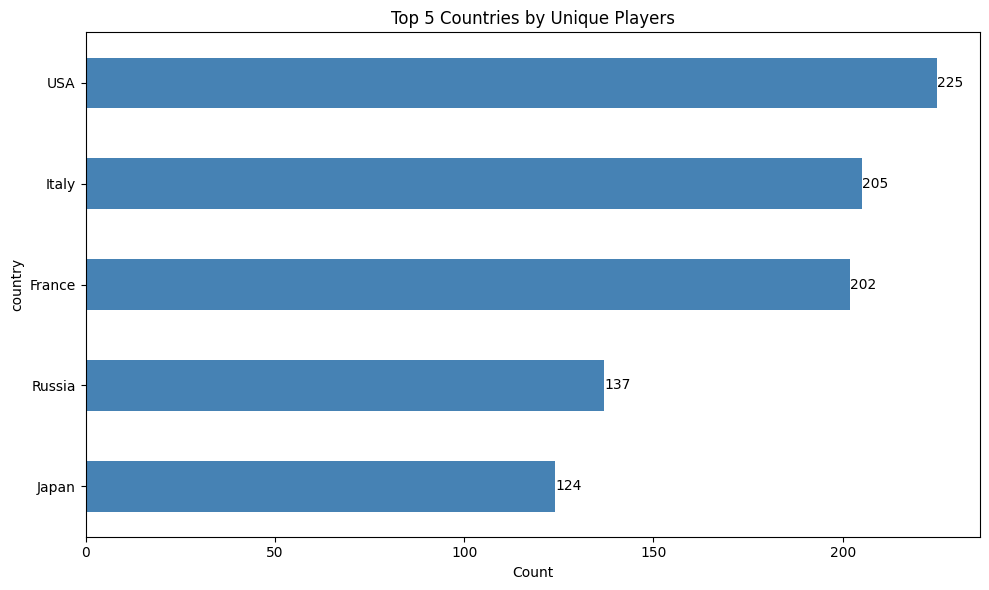

In [7]:
import matplotlib.pyplot as plt

# Get first available users full_name column
id_col = next((col for col in ['full_name'] if col in df_all_players.columns), None)
unique_players = df_all_players.drop_duplicates(id_col)

# Count and plot
country_counts = unique_players['country'].value_counts()
plt.figure(figsize=(10,6))
ax = country_counts.head(5).plot(kind='barh', color='steelblue')

# Formatting
plt.title(f'Top 5 Countries by {"Unique" if id_col else ""} Players')
plt.xlabel('Count')
plt.gca().invert_yaxis()
[ax.text(v, i, f"{v:,}", va='center') for i, v in enumerate(country_counts.head(5))]

plt.tight_layout()
plt.savefig('../data/output/figures/img15.png')
plt.show()

In [8]:
top5_percentage = country_counts.head(5).sum()/country_counts.sum()*100
print(f"Top 5 countries contain {top5_percentage:.1f}% of all players")

gini = country_counts.pow(2).sum()/(country_counts.sum()**2)
print(f"Gini coefficient of player distribution: {gini:.3f}")

Top 5 countries contain 33.7% of all players
Gini coefficient of player distribution: 0.037
